In [1]:
import torch
from diffusers import AutoPipelineForText2Image
import matplotlib.pyplot as plt
import os

/home/solarspaceclouds/Desktop/lora/lora/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/solarspaceclouds/Desktop/lora/lora/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
# Initialize the pipeline with Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"
pipeline = AutoPipelineForText2Image.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

# Define parameters for image generation
text_prompt = "a beautiful sky"
seed = 3 # for reproducibility
num_imgs = 1
h, w = 512, 512
num_inference_steps = 15
guidance_scale = 7.5



Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


In [3]:
# Define a function to save images
def save_image(image, filename):
    image.save(f"{filename}.png")
    print(f"Image saved as {filename}.png")


# Function to generate and save an image
def generate_and_save_image(prompt, lora_weights=None, lora_scale=None, tag=""):
    pipeline.unfuse_lora()  # Clean up for the next generation
    pipeline.unload_lora_weights()  # Ensure no weights are loaded for next run

    generator = torch.Generator(device="cuda").manual_seed(seed)
    if lora_weights:
        pipeline.unfuse_lora()  # Reset previous LoRAs if any
        for weight, scale in zip(lora_weights, lora_scale):
            pipeline.load_lora_weights(weight, weight_name=weight.split("/")[-1])
            pipeline.fuse_lora(lora_scale=scale)
    
    image = pipeline(prompt + tag, generator=generator, num_inference_steps=num_inference_steps, 
                     guidance_scale=guidance_scale, height=h, width=w, 
                     num_images_per_prompt=num_imgs).images[0]
    folder_name = prompt.replace(" ","_")
    folder_path = os.path.join("generated_images", folder_name)
    print(folder_path)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        
    plt.imshow(image)
    save_image(image, f"{folder_path}/{tag if tag else 'basic'}")
    

# Stable Diffusion Model only

100%|██████████| 15/15 [00:01<00:00,  7.84it/s]


generated_images/a_beautiful_sky
Image saved as generated_images/a_beautiful_sky/basic.png


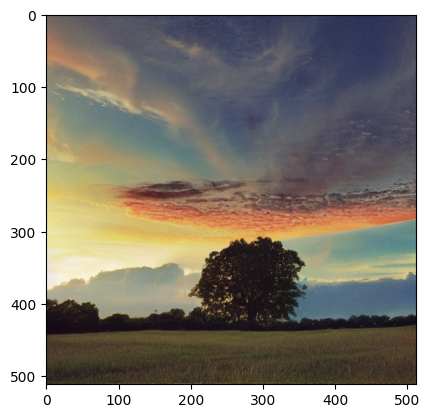

In [4]:
# Generate base model image
generate_and_save_image(text_prompt, tag="basic")

# Single LoRA
- easter egg LoRA, easter egg LoRA with easter egg tag included in text prompt
- jellyfish forest LoRA, jellyfish forest LoRA with jellyfish forest tag included in text prompt
- pixel LoRA, pixel LoRA with pixel tag included in text prompt
- wanostyle LoRA, wanostyle LoRA with wanostyle tag included in text prompt

100%|██████████| 15/15 [00:01<00:00,  8.27it/s]


generated_images/a_beautiful_sky
Image saved as generated_images/a_beautiful_sky/easter.png


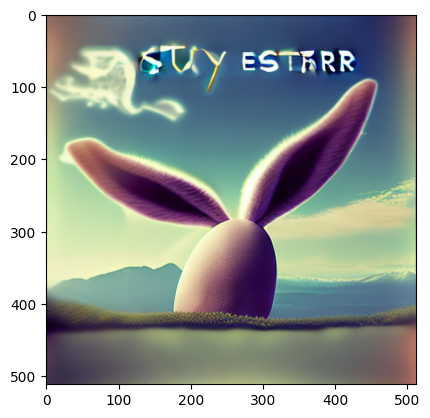

In [5]:
# Apply Single LoRA: Easter Egg with easter egg tag
generate_and_save_image(text_prompt,
                        lora_weights=["./LoRAs/easter-fusion-v2.safetensors"], 
                        lora_scale=[0.7], 
                        tag = "easter")

100%|██████████| 15/15 [00:01<00:00,  8.20it/s]


generated_images/a_beautiful_sky
Image saved as generated_images/a_beautiful_sky/jellyfishforest.png


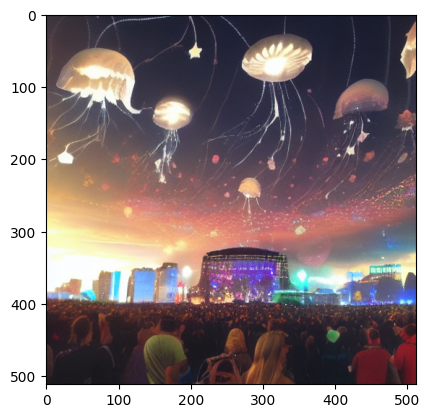

In [6]:
# Apply Single LoRA: Jellyfish Forest
generate_and_save_image(text_prompt, 
                        lora_weights=["./LoRAs/jellyfish-forest.safetensors"], 
                        lora_scale=[0.7], 
                        tag="jellyfishforest")

100%|██████████| 15/15 [00:01<00:00,  7.83it/s]


generated_images/a_beautiful_sky
Image saved as generated_images/a_beautiful_sky/basepixel.png


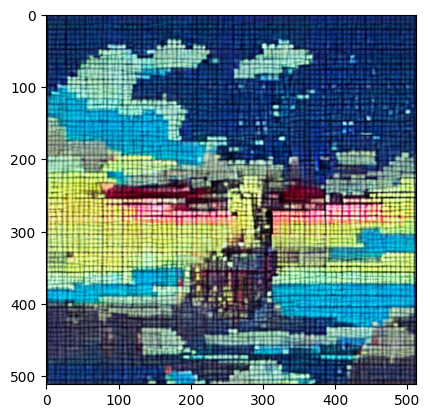

In [7]:
# Apply Single LoRA: Pixel 
generate_and_save_image(text_prompt, 
                        lora_weights=["./LoRAs/basepixel-20.safetensors"], 
                        lora_scale=[0.7], 
                        tag="basepixel")

100%|██████████| 15/15 [00:01<00:00,  8.05it/s]


generated_images/a_beautiful_sky
Image saved as generated_images/a_beautiful_sky/wanostyle.png


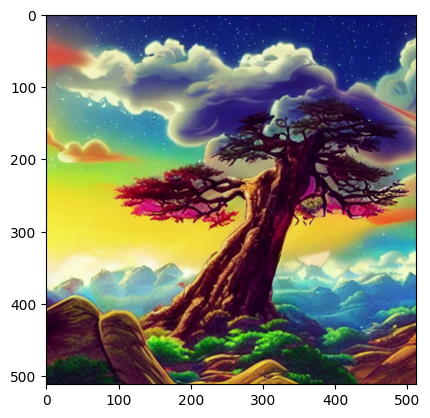

In [8]:
# Apply Single LoRA: Wanostyle 
generate_and_save_image(text_prompt, 
                        lora_weights=["./LoRAs/wanostyle_2_offset.safetensors"], 
                        lora_scale=[0.7], 
                        tag="wanostyle")

# Single LoRAs Results Reflections
- In general, generated image results are better (more closely follow the LoRA) when the specific LoRA tag is included in the text prompt. 
    - Hence, the use of LoRAs WITH the respective LoRA tags is explored
    - LoRA tags can be found on the respective LoRA model download page 
- if text is present in the generated image, it is highly probable that the text does not make sense.

## Apply Multiple LoRAs
- all prompts in this section include the relevant tags of the respective LoRAs

/home/solarspaceclouds/Desktop/lora/lora/lib/python3.11/site-packages/peft/tuners/tuners_utils.py:657: UserWarning: All adapters are already merged, nothing to do.
  warnings.warn("All adapters are already merged, nothing to do.")
100%|██████████| 15/15 [00:01<00:00,  8.03it/s]


generated_images/a_beautiful_sky
Image saved as generated_images/a_beautiful_sky/easter basepixel.png


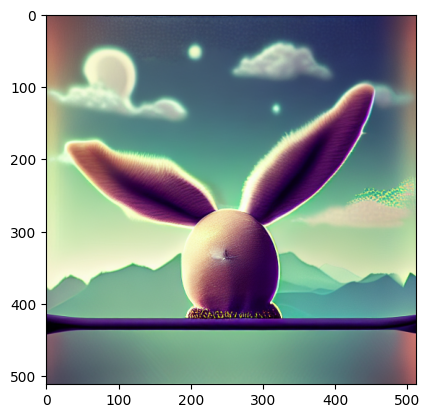

In [9]:
# Apply Multiple LoRAs: Easter + Pixel
generate_and_save_image(text_prompt, 
                        lora_weights=["./LoRAs/easter-fusion-v2.safetensors", "./LoRAs/basepixel-20.safetensors"], 
                        lora_scale=[0.7, 1.0], 
                        tag="easter basepixel")

100%|██████████| 15/15 [00:01<00:00,  7.94it/s]


generated_images/a_beautiful_sky
Image saved as generated_images/a_beautiful_sky/easter jellyfishforest.png


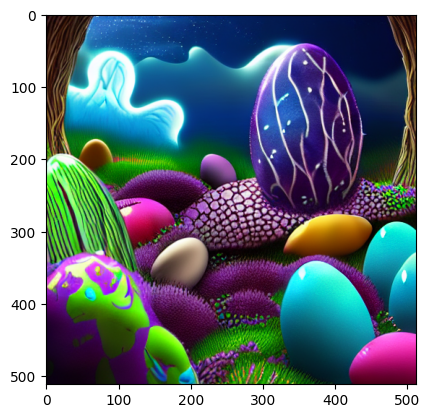

In [10]:
# Apply Multiple LoRAs: Easter + Jellyfish Forest
generate_and_save_image(text_prompt, 
                        lora_weights=["./LoRAs/easter-fusion-v2.safetensors", "./LoRAs/jellyfish-forest.safetensors"], 
                        lora_scale=[0.7, 1.0], 
                        tag="easter jellyfishforest")

100%|██████████| 15/15 [00:01<00:00,  7.97it/s]


generated_images/a_beautiful_sky
Image saved as generated_images/a_beautiful_sky/wanostyle basepixel.png


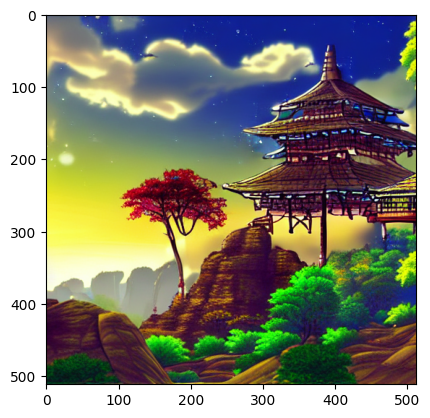

: 

In [11]:
# Apply Multiple LoRAs: Wanostyle + Pixel
generate_and_save_image(text_prompt, 
                        lora_weights=["./LoRAs/wanostyle_2_offset.safetensors", "./LoRAs/basepixel-20.safetensors"], 
                        lora_scale=[0.8, 1], 
                        tag="wanostyle basepixel")

# Multiple LoRAs Results Reflections

In [ ]:
Results from merging multiple LoRAs tend to be beautiful, aesthetically-pleasing for a landscape text prompt.
This could be due to
- a wider variety of stylistic renditions can be applied on landscape subject matter (better than single object form)
- fortunate suitability of num_inference_steps and guidance scale
  - optimal num_inference_steps and guidance scale can be determined empirically (trial and error)